In [1]:
import pandas as pd
import numpy as np
import os
import re
from string import punctuation

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial.distance import cosine
import ast

import ast
import fasttext
import itertools
import math
import pickle
import pprint

import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
import spacy
from gensim.models import CoherenceModel

from sklearn.cluster import KMeans
from collections import defaultdict, Counter

from tqdm import tqdm
tqdm.pandas()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import Counter
import cosinescore

from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import json
import mutualinfo

from itertools import chain

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.manifold import TSNE
from collections import OrderedDict
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import random
from matplotlib.colors import LogNorm, Normalize
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter, AutoMinorLocator


%matplotlib inline

C:\Users\Paulius\AppData\Roaming\Python\Python38\site-packages\tqdm\std.py:702: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
from gensim.models import FastText

model = FastText.load_fasttext_format(r'C:\Users\Paulius\OneDrive\Oxford University\Other\OxAI\cc.en.300.bin')


<ipython-input-2-116423092079>:3: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  model = FastText.load_fasttext_format(r'C:\Users\Paulius\OneDrive\Oxford University\Other\OxAI\cc.en.300.bin')


In [3]:
from scipy.spatial.distance import cosine

In [4]:
word_ls = ['ctbt', 'npt', 'nonproliferation', 'tlateloco', 'rarotonga', 'treaties', 'pelindaba',
            'signatory', 'protocol', 'entreaties']

In [30]:
for word in word_ls:
    print(word, np.round(1 - cosine(model.wv['treaty'], model.wv[word]),2))

ctbt 0.03
npt 0.15
nonproliferation 0.42
tlateloco -0.02
rarotonga 0.03
treaties 0.85
pelindaba 0.03
signatory 0.52
protocol 0.36
entreaties 0.19


In [5]:
words = pd.read_excel("./Datasets/2021-08-06 dataset_treaty.xlsx")

XLRDError: Excel xlsx file; not supported

In [ ]:
print(words.to_latex(index=False))

In [34]:
weights = pd.read_excel("2021-08-06 weighting.xlsx")

In [37]:
print(weights.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
        Unnamed: 0 &   k=5 &  k=10 &  k=15 &  k=20 \\
\midrule
Mutual Information &  0.18 &  0.15 &  0.12 &  0.10 \\
         TF-IF (1) &  0.08 &  0.07 &  0.07 &  0.06 \\
         TF-IF (2) &  0.09 &  0.07 &  0.07 &  0.06 \\
         Euclidean & -0.27 & -0.06 & -0.07 & -0.08 \\
\bottomrule
\end{tabular}



In [2]:
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
from scipy.spatial.distance import cosine

In [4]:
i=0
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'

In [5]:
embed_files = pd.read_pickle(dir_ + fname )

In [6]:
i=5
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files2 = pd.read_pickle(dir_ + fname)

In [7]:
def get_cosine_df(embed_files):
    embeds_df = pd.DataFrame(embed_files).transpose()
    cos_df = pd.DataFrame(cosine_similarity(embeds_df))
    cos_df.columns = embeds_df.index
    cos_df.index = embeds_df.index
    
    return cos_df

def get_topwords(df, n=501):
    words = {}
    for col in tqdm(df.columns):
        words[col] = df[col].nlargest(n).index[1:]
    return words

In [124]:
nearest_neighbors = {}
for i in range(0,10):
    print(i)
    
    # Get dictionary files
    dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
    fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
    embed_files = pd.read_pickle(dir_ + fname)
    
    # Get neaarest neighbors
    cos_df = get_cosine_df(embed_files)
    neighbors = get_topwords(cos_df)
    
    nearest_neighbors[i] = neighbors

0


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:57<00:00, 224.05it/s]


1


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:48<00:00, 240.71it/s]


2


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:45<00:00, 247.53it/s]


3


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:44<00:00, 250.07it/s]


4


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:54<00:00, 229.46it/s]


5


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:46<00:00, 245.26it/s]


6


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:44<00:00, 251.44it/s]


7


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:49<00:00, 240.14it/s]


8


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:38<00:00, 265.01it/s]


9


100%|███████████████████████████████████████████████████████████████████████████| 26235/26235 [01:46<00:00, 246.35it/s]


In [977]:
with open('./embedding_files/top_neighors_words.pickle', 'wb') as handle:
    pickle.dump(nearest_neighbors, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [14]:
nearest_neighbors = pd.read_pickle('./embedding_files/top_neighors_words.pickle')

### Calculate the overlap

In [17]:
def size_intersection(dict1, dict2, word, n):
    """Get the size of the intersection of the two dictionaries/words"""
    return (len(set(dict1[word][:n]).intersection(set(dict2[word][:n]))))/n

In [22]:
i=0
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files0 = pd.read_pickle(dir_ + fname)

i=1
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files1 = pd.read_pickle(dir_ + fname)

i=2
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files2 = pd.read_pickle(dir_ + fname)

i=3
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files3 = pd.read_pickle(dir_ + fname)

i=4
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files4 = pd.read_pickle(dir_ + fname)

i=5
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files5 = pd.read_pickle(dir_ + fname)

i=6
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files6 = pd.read_pickle(dir_ + fname)


i=7
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files7 = pd.read_pickle(dir_ + fname)


i=8
# Get dictionary files
dir_ = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\embedding_files'
fname = fr'\2021-08-02 fasttext vectors {i}.pickle'
embed_files8 = pd.read_pickle(dir_ + fname)

0
mean: 0.26364398704021347
1
mean: 0.6298113207547169
2
mean: 0.6301018571458822
3
mean: 0.6299095779598923
4
mean: 0.6307557757872223
5
mean: 0.6306647184634606
6
mean: 0.6296863816360673
7
mean: 0.6305355441204498
8
mean: 0.2624289011710395
9
mean: 0.26255511085699773


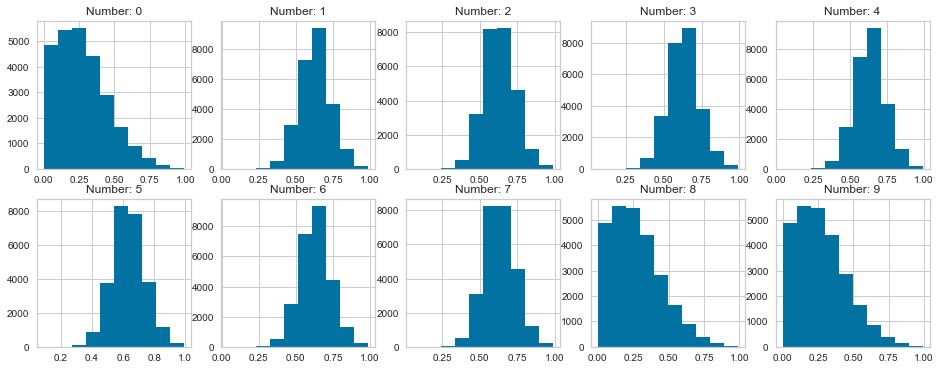

In [280]:
fig, axs = plt.subplots(2,5, figsize=(16,6))

axs_list = axs.flatten()
for k in range(0,10):
    print(k)
    i_ls = [x for x in range(10) if x != k]

    union = {}
    for w in vocab:
        union[w] = [size_intersection(nearest_neighbors[k], nearest_neighbors[i], w, 10) for i in i_ls]

    avg_sim = [np.array(x).mean() for x in union.values()]
    print(f"mean: {np.mean(avg_sim)}")
    axs_list[k].hist(pd.Series(avg_sim))
    axs_list[k].set_title(f"Number: {k}")

In [29]:
groundtruth = nearest_neighbors[1]

In [358]:
%store nearest_neighbors

Stored 'nearest_neighbors' (dict)


In [30]:
similarities_n = {}
for n in tqdm([5,10,20,50,100,200,500]):
    ls_similarities = []
    for word in vocab:
        ls_similarities.append(np.mean(np.array([size_intersection(groundtruth, nearest_neighbors[i], word, n) for i in range(2,8)])))
    
    similarities_n[n] = np.array(ls_similarities)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:19<00:00, 11.36s/it]


In [31]:
vocab_ls = list(vocab)

In [32]:
# Get the stability for each word
similarities_words = {}

for word in tqdm(vocab_ls):
    similarities_words[word] = np.mean(np.array([size_intersection(groundtruth, nearest_neighbors[i], word, 10) for i in range(2,8)]))

100%|██████████████████████████████████████████████████████████████████████████| 26235/26235 [00:04<00:00, 6227.83it/s]


0.8411968744044217
0.8305202973127501
0.8219966965249985
0.8202910869703324
0.8268160218537578
0.8390580966901721
0.8614372530334795


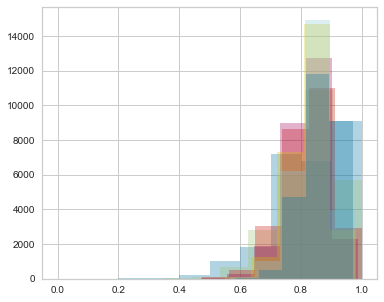

In [343]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
for n in [5,10,20,50,100,200,500]:
    print(np.mean(similarities_n[n]))
    ax.hist(pd.Series(similarities_n[n]), alpha=0.3)

In [ ]:
# Import embedding arrays

In [4]:
fpath = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\Datasets'
# Import
embed_arr = pd.read_pickle(fpath + r'\2021-07-22 embeddings_arrays_final.pickle')
index_vals = pd.read_pickle(fpath + r'\2021-07-22 index_values.pickle')
topic_vals = pd.read_pickle(fpath + r'\2021-07-22 sentences_words.pickle')

In [658]:
embed_arr.keys()

dict_keys(['embed', 'double', 'single', 'tfidf', 'index'])

In [660]:
topic_vals.keys()

dict_keys(['sentences', 'cond_probs', 'mi_score', 'topwords'])

In [665]:
embed_arr

array([22, 10, 22, 21,  8,  2,  5,  3, 18,  3,  2,  8,  3, 27,  2, 27, 27,
       13,  4,  4, 13, 12, 26, 25, 18, 18, 13,  3, 26, 18, 26, 12, 13, 12,
       27, 26,  2, 13,  2, 12, 13, 13,  0, 27, 27, 27, 27, 27, 27, 20, 20,
        4, 16,  2,  3, 18, 13,  2,  3, 22,  1,  2,  1, 17, 13, 13, 22,  3,
        3,  3,  3, 18])

In [666]:
kmeans_labels = pd.read_pickle(fpath + r'\2021-08-01 kmeans_labels.pickle')

In [670]:
kmeans_labels.__len__()

236880

In [186]:
embed_arr.keys()

dict_keys(['embed', 'double', 'single', 'tfidf', 'index'])

In [ ]:
df_all = pd.read_csv('./Datasets/2021-07-14 dataset_all.csv')
df_all.text_clean = df_all.text_clean.progress_map(ast.literal_eval)

In [271]:
# Get top words
n_words = df_all.text_clean.explode().value_counts().sort_values(ascending=False)
n_words = n_words[n_words.index.isin(vocab)]

1. Get frequency bucket
2. Get all values for all frequency buckets
3. average
4. Plot in a heatmap

In [272]:
words_df = pd.DataFrame(n_words)
words_df.columns = ['n_mentions']
words_df['stability'] = words_df.index.map(similarities_words)

In [591]:
words_df['n_mentions_log'] = np.log10(words_df.n_mentions)
words_df['stability_range'] = pd.cut(words_df['stability'], 50)
words_df['mentions_range'] = pd.cut(words_df['n_mentions_log'], 50)

In [592]:
words_df.head()

,n_mentions,stability,n_mentions_log,stability_range,mentions_range
the,2043380,0.883333,6.310349,"(0.869, 0.888]","(6.196, 6.31]"
of,1237908,0.983333,6.092688,"(0.981, 1.0]","(6.082, 6.196]"
and,876119,0.983333,5.942563,"(0.981, 1.0]","(5.854, 5.968]"
to,802499,0.950000,5.904444,"(0.944, 0.963]","(5.854, 5.968]"
in,567057,0.683333,5.753627,"(0.683, 0.701]","(5.74, 5.854]"


In [593]:
plot_stab = pd.pivot_table(index='stability_range', columns='mentions_range', aggfunc=len, data=words_df).fillna(0)

In [594]:
plot_stab= plot_stab['n_mentions_log']

In [595]:
plot_stab = plot_stab.loc[plot_stab.index[::-1]]

In [596]:
cmap = sns.color_palette("flare", as_cmap=True)

In [597]:
def getlabelmean(label):
    return np.round(np.mean(np.array([float(x) for x in label[1:-1].split(', ')])),2)

def get_name(labels):
    labels_adj = [int(x)+1 for x in labels]
    return [r"$10^{" + str(x) + "}$" for x in labels_adj]

### Draw some stuff on top of the plot (!). Such as average similarity and additional explanations. 

In [599]:
plot_stab.index[0]

Interval(0.981, 1.0, closed='right')

In [600]:
lvl = plot_stab.index[0]

In [601]:
lvl.left

0.981

In [602]:
def get_stability(lvl):
    l, r = lvl.left, lvl.right
    l = int(np.round(l, 2) * 100)
    r = int(np.round(r, 2) * 100)
    return str(l) + '% - ' + str(r) + "%"

In [603]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

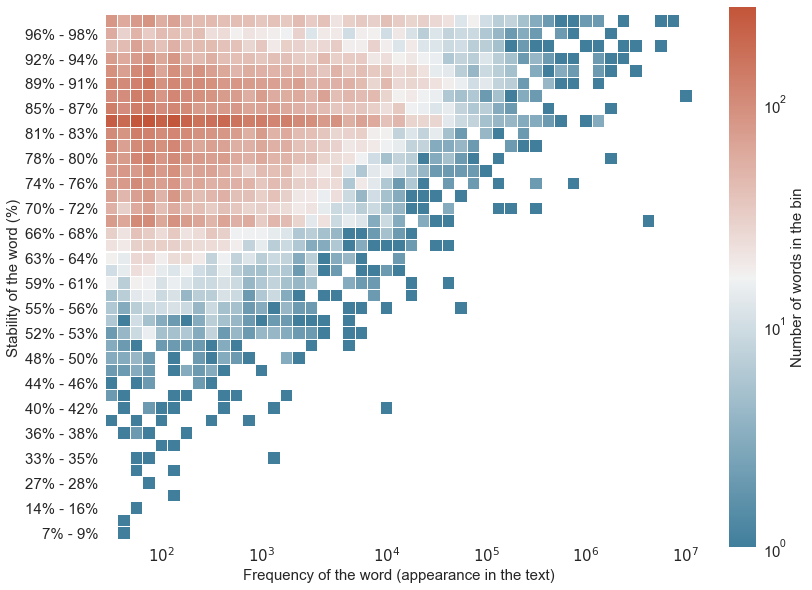

In [608]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(plot_stab, norm=LogNorm(), square=True, cmap=cmap, linewidth=0.01, linecolor='white', cbar_kws={"shrink": 0.65, 'label': 'Number of words in the bin'})
fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels_new = [getlabelmean(x) for x in labels]
labels_names = get_name(labels_new)

ax.set_xticklabels(labels_names, rotation=0);
ax.set_xlabel("Frequency of the word (appearance in the text)");
ax.set_ylabel("Stability of the word (%)");

unique_labels = []
unique_labels.append("^{15}$')")
unique_labels.append("^{1}$')")

for label in ax.xaxis.get_ticklabels():
    k = str(label).split('$10')[-1]    
    if k in unique_labels:
        label.set_visible(False)
    else:
        unique_labels.append(k)
        
# Set stability of Y index
indices_y = [get_stability(l) for l in plot_stab.index]
ax.set_yticklabels(indices_y, rotation=0)

locs=['top', 'right', 'left', 'bottom']
for loc in locs: ax.spines[loc].set_visible(False)
    
#ax.set_title("Embedding stability", loc='left')

for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
plt.tight_layout()
fig.savefig('./Figures/2021-08-04 embedding_word_stability.pdf')

In [609]:
2.72**15

3300149.091368023

In [868]:
embed_arr.keys()

dict_keys(['embed', 'double', 'single', 'tfidf', 'index'])

### Calculating sentence embeddings

In [702]:
def sentence_embed(sentence, tfidf, embed_file):
    return np.mean([np.dot(embed_file[em], tf) for em, tf in zip(sentence, tfidf)], axis=0)

In [857]:
def transform_tfidf(k, tfidf_sent, vocab=vocab):
    """Get a new embedding and tf-idf array by excluding words that do not have vocabulary.
    args: k - the list of word tokens; tfidf_sent - the list of tf-idf arrays of the sentece"""
    # Get words that do not exist
    no_words = [x for x in k if x not in vocab]

    # Get indices to keep
    remove_ws = []
    for word in no_words:
        remove_ws.append(k.index(word))
    
    # If there are multiple values, then remove them in another way
    if len(remove_ws) != set(remove_ws):
        remove_indices = []
        for word in no_words:
        
            remove_indices += [i for i, x in enumerate(k) if x == word]
        
        keep_ws = [x for x in range(len(k)) if x not in remove_indices]
        
    else:
        keep_ws = [x for x in range(len(k)) if x not in set(remove_ws)]

    # Get new TF-IDF array
    new_idf = tfidf_sent[keep_ws]
    new_idf /= new_idf.sum()

    # Get new embedding array
    new_embed = np.array(k)[keep_ws]
    #print(f"Removed {len(remove_ws)} words")
    #print(f"Removed: {remove_ws}")
    
    return new_embed, new_idf

In [858]:
def calculate_embedding(i, embed_file, embed_arr=embed_arr):
    """Calculate the embedding based on the index i that refers to an input to the dictionary in the embedding_arr object"""
    try:
        s = sentence_embed(embed_arr['double'][i], embed_arr['tfidf'][i], embed_file)
    except KeyError:
        new_embed, new_idf = transform_tfidf(embed_arr['double'][i], embed_arr['tfidf'][i])
        s = sentence_embed(new_embed, new_idf, embed_file)

    return s

In [859]:
n_sentences = embed_arr['double'].__len__()

In [860]:
embed_files_all = [embed_files1, embed_files2, embed_files3, embed_files4, embed_files5, embed_files6, embed_files7]

In [861]:
sentence_dictionaries = {}

# Loop over all indices
for i, embed_file in enumerate(embed_files_all):
    print(i)
    sentence_dictionaries[i+1] = []
    
    # Loop over all sentences
    for index_ in tqdm(range(n_sentences)):
        sentence_dictionaries[i+1].append(calculate_embedding(index_, embed_file))

  0%|                                                                                       | 0/236880 [00:00<?, ?it/s]<ipython-input-857-b1bc6c4aaffa>:26: RuntimeWarning: invalid value encountered in true_divide
  new_idf /= new_idf.sum()
  0%|▏                                                                          | 460/236880 [00:00<00:51, 4583.79it/s]

0


  0%|▏                                                                          | 477/236880 [00:00<00:54, 4320.51it/s]

1


  0%|▏                                                                          | 525/236880 [00:00<00:50, 4703.00it/s]

2


  0%|▏                                                                          | 462/236880 [00:00<00:51, 4618.12it/s]

3


  0%|                                                                           | 344/236880 [00:00<01:09, 3405.98it/s]

4


  0%|▏                                                                          | 471/236880 [00:00<00:51, 4619.84it/s]

5


  0%|▎                                                                          | 848/236880 [00:00<00:56, 4141.87it/s]

6


100%|████████████████████████████████████████████████████████████████████████| 236880/236880 [00:53<00:00, 4423.68it/s]


In [978]:
with open('./embedding_files/sentence_embeddings.pickle', 'wb') as handle:
    pickle.dump(sentence_dictionaries, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Importing sentence embeddings

In [39]:
sentence_dictionaries = pd.read_pickle('./embedding_files/sentence_embeddings.pickle')

In [40]:
gtruth = sentence_dictionaries[1]

In [41]:
sentence_dictionaries.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7])

In [42]:
keep_indices = [i for i, x in enumerate(sentence_dictionaries[2]) if not np.isnan(x).any()]

In [43]:
s_filtered = {}
for i in range(1,8):
    s_filtered[i] = np.array(sentence_dictionaries[i])[keep_indices]

In [967]:
# Get a random dataframe
n_samples = len(trial_df)
random_sample = random.sample(range(n_samples), 26_500)

In [976]:
with open('./embedding_files/randomsample.pickle', 'wb') as handle:
    pickle.dump(random_sample, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
random_sample = pd.read_pickle('./embedding_files/randomsample.pickle')

In [184]:
len(random_sample)

26500

In [968]:
trial_df = pd.DataFrame(s_filtered[2])

### Upload nearest neighbors of sentences and continue extracting them

In [ ]:
nns_sentences = pd.read_pickle('./embedding_files/sentence_nns.pickle')

In [49]:
for i in range(5,8):
    trial_df = pd.DataFrame(s_filtered[i])
    cos_df = pd.DataFrame(cosine_similarity(trial_df.loc[random_sample]))
    topindices = get_topwords(cos_df)
    
    nns_sentences[i] = topindices

100%|███████████████████████████████████████████████████████████████████████████| 26500/26500 [01:32<00:00, 286.55it/s]


In [973]:
with open('./embedding_files/sentence_nns.pickle', 'wb') as handle:
    pickle.dump(nns_sentences, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [59]:
groundtruth = nns_sentences[1]

In [941]:
nns_sentences[1][0]

Int64Index([  36, 9383, 2129, 6963, 5711, 1925, 7059, 3187, 7467, 9240,
            ...
            5630, 6363, 3079, 7873, 4928, 7248, 3936, 5604, 8913, 3216],
           dtype='int64', length=500)

In [54]:
def size_intersection(dict1, dict2, word, n):
    """Get the size of the intersection of the two dictionaries/words"""
    return (len(set(dict1[word][:n]).intersection(set(dict2[word][:n]))))/n



In [56]:
#size_intersection(groundtruth, nns_sentences[2], 0, 10)

In [60]:
gr_keys = groundtruth.keys()

In [170]:
nns_sentences[2][0]

Int64Index([25364, 13649, 23218, 18801, 15117,  1048, 10868, 14646, 19260,
            22740,
            ...
            22698, 19102,  6645, 22125, 20578, 13895, 24844, 23184, 19400,
            17978],
           dtype='int64', length=500)

In [178]:
%store nns_sentences

Stored 'nns_sentences' (dict)


In [61]:
similarities_n_sents = {}
for n in tqdm([5,10,20,50,100,200,500]):
    ls_similarities = []
    for ind in gr_keys:
        ls_similarities.append(np.mean(np.array([size_intersection(groundtruth, nns_sentences[i], ind, n) for i in range(2,8)])))
    
    similarities_n_sents[n] = np.array(ls_similarities)

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:33<00:00, 13.39s/it]


In [166]:
for n in tqdm([12]):
    ls_similarities = []
    for ind in gr_keys:
        ls_similarities.append(np.mean(np.array([size_intersection(groundtruth, nns_sentences[i], ind, n) for i in range(2,8)])))
    
    similarities_n_sents[n] = np.array(ls_similarities)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.93s/it]


In [168]:
similarities_n_sents[12].mean()

0.851979035639413

In the dataset, there are 26.5K words that were used for testing the stability of the embeddings. However, there are over 800 unique sentences and, hence, sentence embeddings. It is computationally challenging to compute the pair-wise cosine similarities for all the unique sentences. To make the similarities and analyses between word and sentence embeddings comparable, I sample 26.5K sentences. Based on the XX test, this ensures representativeness of at least 99%.

<AxesSubplot:>

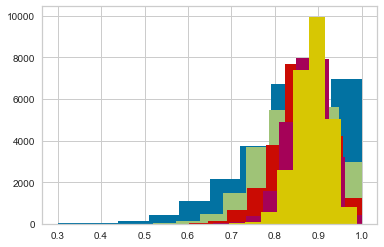

In [62]:
pd.Series(similarities_n_sents[5]).hist()
pd.Series(similarities_n_sents[10]).hist()
pd.Series(similarities_n_sents[20]).hist()
pd.Series(similarities_n_sents[50]).hist()
pd.Series(similarities_n_sents[100]).hist()

In [109]:
similar_df = pd.melt(pd.DataFrame(similarities_n_sents))

In [110]:
similar_df['Stability of'] = 'sentences'

In [111]:
similar_df_words = pd.melt(pd.DataFrame(similarities_n))

In [112]:
similar_df_words['Stability of'] = 'words'

In [113]:
df_merged = pd.concat([similar_df, similar_df_words])

In [118]:
def set_size(plt):
    SMALL_SIZE = 15
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 15

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


I perform a paired t-test because the variances are not equal

In [137]:
from scipy.stats import ttest_rel, ttest_ind

In [147]:
dict_ks = {}
for k in [5,10, 20, 50, 100, 200, 500, 1000]:
    dict_ks[k] = {}
    for i in ['sentences', 'words']:
        dict_ks[k][i] = df_merged.loc[(df_merged.variable==k) & (df_merged['Stability of'] == i), 'value']

In [158]:
for k in [5,10, 20, 50, 100, 200, 500]:
    for i in ['sentences', 'words']:
        print(i, k, "---------", np.round(dict_ks[k][i].mean(), 2))

sentences 5 --------- 0.83
words 5 --------- 0.84
sentences 10 --------- 0.85
words 10 --------- 0.83
sentences 20 --------- 0.86
words 20 --------- 0.82
sentences 50 --------- 0.88
words 50 --------- 0.82
sentences 100 --------- 0.88
words 100 --------- 0.83
sentences 200 --------- 0.89
words 200 --------- 0.84
sentences 500 --------- 0.91
words 500 --------- 0.86


In [148]:
df_merged.head()

,variable,value,Stability of
0,5,0.966667,sentences
1,5,0.800000,sentences
2,5,0.833333,sentences
3,5,0.800000,sentences
4,5,1.000000,sentences


In [152]:
df_merged.variable.max()

500

In [149]:
ttest_ind(dict_ks[5]['sentences'], dict_ks[5]['words'], equal_var=False)

Ttest_indResult(statistic=-6.798239133402649, pvalue=1.0704262492872514e-11)

Create another graph showing the difference in the averages of the two embedding spaces (!!) This is gonna be wicked...

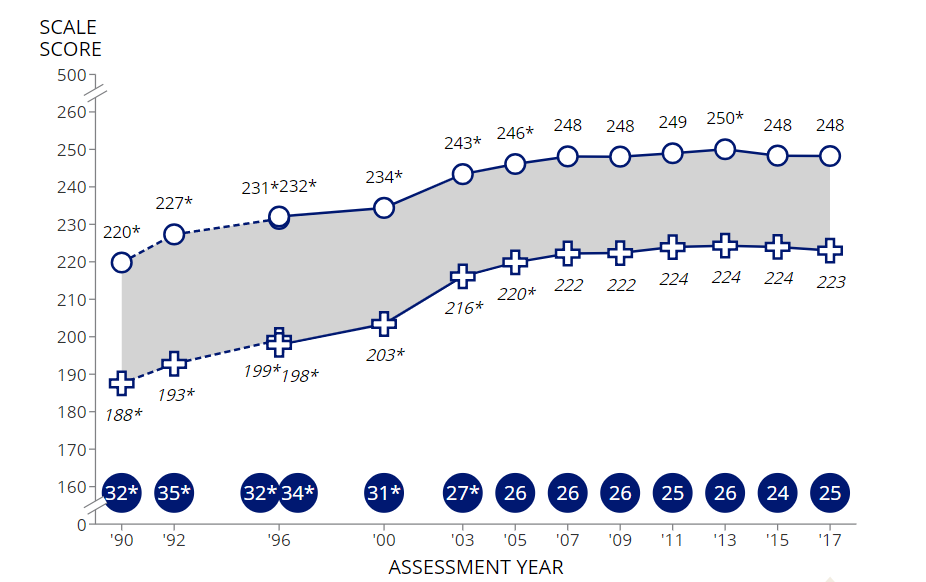

In [ ]:
from random import randrange


In [314]:
df_merged['value'] = df_merged.value * 100

In [ ]:
sentences_similarity = pd.read_pickle('sentences_similarities.pickle')

In [ ]:
words_similarity = pd.read_pickle('words_similarities.pickle')

In [ ]:
sentences_similarity[1]

In [ ]:
def get_similarity(sentences_similarity):
    overall_sim = {}
    for i in sentences_similarity.keys():
        overall_sim[i] = sentences_similarity[i].mean()
        
    sim_df = pd.DataFrame(pd.Series(overall_sim))
    sim_df = sim_df.reset_index()
    sim_df.columns = ['Nearest neighbors', 'Similarity, %']
    sim_df['Similarity, %'] = sim_df['Similarity, %'] * 100
    
    return sim_df

In [ ]:
word_df = get_similarity(words_similarity)

In [436]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [645]:
def sim_plot(ax):
    
    sns.lineplot(x='Nearest neighbors', y='Similarity, %', data=sim_df, color=colorcodes[0])
    sns.lineplot(x='Nearest neighbors', y='Similarity, %', data=word_df, color=colorcodes[-1])

    #A = sim_df['Nearest neighbors']
    #B = sim_df['Similarity, %']

    #for i, xy in enumerate(zip(A, B)):
    #    if i % 30 == 0:
    #        ax.annotate(f"{np.round(y,2)}", xy=xy, textcoords='data') # <--

    plt.fill_between(sim_df['Nearest neighbors'], sim_df['Similarity, %'], word_df['Similarity, %'], color='#DEDEDE', alpha=0.5)
    locs=['top', 'right']
    for loc in locs: ax.spines[loc].set_visible(False)
    ax.grid(False)
    ax.tick_params(which='major', length=4)
    ax.set_ylabel("Stability, %")

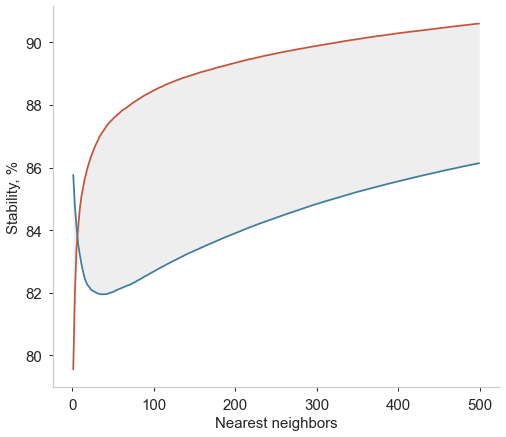

In [657]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

sim_plot(ax)
fig.savefig('./Figures/2021-08-04 stability_many_nns.pdf')

In [377]:
colorcodes = ['#C3553A', '#D79787', '#B6CBD6', '#407E9C']
cols = ['#C3553A', '#407E9C']

In [647]:
def stab_boxplot(ax):
    g = sns.boxplot(x='variable', y='value', hue='Stability of', data=df_merged, palette=cols)

    ax.set_xlabel("Number of nearest neighbors")
    ax.set_ylabel("Stability, %")
    locs=['top', 'right', 'left']
    for loc in locs: ax.spines[loc].set_visible(False)

    ax.grid(False)
    set_size(plt)


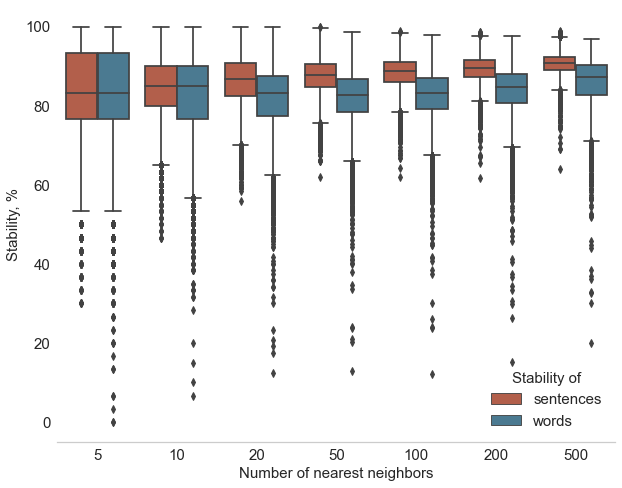

In [655]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
stab_boxplot(ax)

fig.savefig('./Figures/2021-08-04 NNs_sentences_words.pdf')

### Get sentences based on the sequence

In [180]:
nns_sentences[3][1]

Int64Index([ 4326, 14499, 15202, 13916, 22119,  6648, 21702, 24716,  7231,
             9526,
            ...
            21705,  4180, 23407,  2557,  9427, 10594,   188, 17412, 23602,
            22569],
           dtype='int64', length=500)

In [222]:
# Calculating the lengths of a sentence

lengths_dict = {}
for i, index_ in enumerate(random_sample):
    lengths_dict[i] = len(embed_arr['double'][index_])

In [223]:
random_sample[0]

23767

In [225]:
index_vocab = list(lengths_dict.keys())

In [226]:
len(index_vocab)

26500

In [227]:
df_sl = pd.DataFrame(pd.Series(lengths_dict))
df_sl.columns = ['length']

In [228]:
def size_intersection(dict1, dict2, word, n):
    """Get the size of the intersection of the two dictionaries/words"""
    return (len(set(dict1[word][:n]).intersection(set(dict2[word][:n]))))/n



In [229]:
random_sample[0]

23767

In [230]:
# Get the stability for each sentence
similarities_sentences = {}

for index_ in tqdm(index_vocab):
    similarities_sentences[index_] = np.mean(np.array([size_intersection(groundtruth, nns_sentences[i], index_, 10) for i in range(2,8)]))

100%|██████████████████████████████████████████████████████████████████████████| 26500/26500 [00:05<00:00, 4981.44it/s]


In [243]:
sim_by_sentence = pd.DataFrame(pd.Series(similarities_sentences))
sim_by_sentence.columns = ['Similarity']

In [246]:
df_sl = df_sl.merge(sim_by_sentence, left_index=True, right_index=True)

In [251]:
df_sl['length_log'] = df_sl.length.apply(np.log)

In [266]:
df_sl['stability_range'] = pd.cut(df_sl['Similarity'], 50)
df_sl['length_range'] = pd.cut(df_sl['length_log'], 50)
sent_stab = pd.pivot_table(index='stability_range', columns='length_range', aggfunc=len, data=df_sl).fillna(0)
sent_stab = sent_stab.loc[sent_stab.index[::-1]]['length_log']

In [262]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)


In [532]:
def get_range(ind):
    l, r = ind.left, ind.right
    l, r = np.round(math.e**l,2), np.round(math.e**r,2)
    return str(int(l)) + '-' + str(int(r))

In [524]:
ind = sent_stab.columns[1]

In [563]:
ax.get_xticklabels()[0].get_text()

'(1.094, 1.189]'

In [621]:
def getlabel(label):
    l, r = np.array([float(x) for x in label[1:-1].split(', ')])
    l, r = np.round(math.e**l,2), np.round(math.e**r,2)
    return str(int(l)) + '-' + str(int(r))

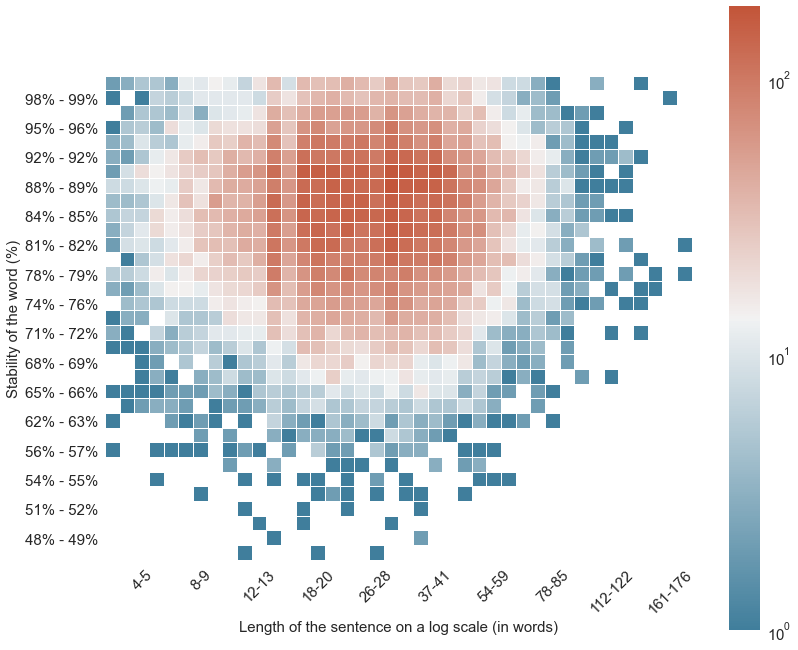

In [654]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(sent_stab, norm=LogNorm(), square=True, cmap=cmap, linewidth=0.01, linecolor='white', cbar_kws={'shrink': 0.75})
#fig.canvas.draw()

#ax.set_xticklabels(labels_names, rotation=0);
ax.set_xlabel("Length of the sentence on a log scale (in words)");
ax.set_ylabel("Stability of the word (%)");

labels = [getlabel(ind.get_text()) for ind in ax.get_xticklabels()]

locs=['top', 'right']
for loc in locs: ax.spines[loc].set_visible(False)
    
indices_y = [get_stability(l) for l in sent_stab.index]

ax.set_yticklabels(indices_y, rotation=0)
ax.set_xticklabels(labels, rotation=45)

for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)


#ax.set_title("Embedding stability", loc='left')

plt.tight_layout()
fig.savefig('./Figures/2021-08-04 sentence_stability_length.pdf')

<AxesSubplot:xlabel='length_log', ylabel='Similarity'>

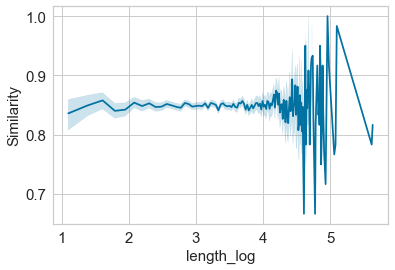

In [269]:
sns.lineplot(data=df_sl, x="length_log", y="Similarity")

<AxesSubplot:xlabel='length_log'>

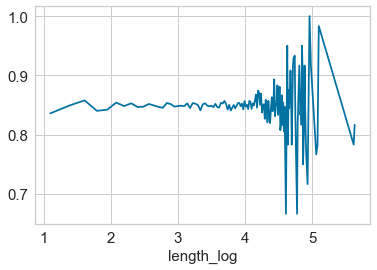

In [252]:
df_sl.groupby('length_log').Similarity.mean().plot()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
sns.heatmap(plot_stab, norm=LogNorm(), square=True, cmap=cmap, linewidth=0.05, linecolor='grey')
fig.canvas.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
labels_new = [getlabelmean(x) for x in labels]
labels_names = get_name(labels_new)

ax.set_xticklabels(labels_names, rotation=0);
ax.set_xlabel("Frequency of the word");
ax.set_ylabel("Stability of the word (%)");

unique_labels = []
unique_labels.append("^{15}$')")
unique_labels.append("^{2}$')")
for label in ax.xaxis.get_ticklabels():
    k = str(label).split('$2')[-1]    
    if k in unique_labels:
        label.set_visible(False)
    else:
        unique_labels.append(k)
        
locs=['top', 'right', 'left', 'bottom']
for loc in locs: ax.spines[loc].set_visible(False)
    
ax.set_title("Embedding stability", loc='left')
#for label in ax.xaxis.get_ticklabels()[::2]:
#   label.set_visible(True)

In [7]:
dfa = pd.read_csv('./Datasets/2021-07-16 data_africa.csv')

In [8]:
dfa['sentences_multiple_tokens'] = dfa.sentences_multiple_tokens.progress_map(ast.literal_eval)

100%|██████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:25<00:00, 94.31it/s]


In [9]:
items_ls = list(dfa.sentences_multiple_tokens.explode())

In [175]:
fpath = r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Data\Datasets'
# Import
embed_arr = pd.read_pickle(fpath + r'\2021-07-22 embeddings_arrays_final.pickle')
index_vals = pd.read_pickle(fpath + r'\2021-07-22 index_values.pickle')
topic_vals = pd.read_pickle(fpath + r'\2021-07-22 sentences_words.pickle')

In [14]:
compare_sentences = embed_arr['double']

In [17]:
def process_indices(items):
    results = []
    for item in tqdm(items):
        results.append(items_ls.index(item))
    return results

In [84]:
results = process_indices(compare_sentences)

  8%|█████▋                                                                   | 18513/236880 [00:04<00:55, 3930.97it/s]


KeyboardInterrupt: 

In [ ]:
len(results) == len(embed_arr['double'])

In [23]:
indices_use = results

In [26]:
series_exploded = dfa.sentences_multiple_tokens.explode()
series_filtered = series_exploded.iloc[indices_use]
speech_numbers = series_filtered.index

In [32]:
len(speech_numbers) == len(embed_arr['double'])

True

In [35]:
speech_numbers.max()

2425

In [104]:
speech2war = {}
for i in range(speech_numbers.max() + 1):
    speech2war[i] = int(dfa.loc[i, 'is_war'])

In [105]:
speech2country = {}
for i in range(speech_numbers.max() + 1):
    speech2country[i] = dfa.loc[i, 'countryname']

In [48]:
# Get whether each index is at war or not
war_numbers = [speech2war[x] for x in speech_numbers]

In [133]:
country_numbers = [speech2country[x] for x in speech_numbers]
country_numbers = np.array(country_numbers)

In [109]:
war_numbers[0]

0

In [110]:
len(war_numbers) == len(embed_arr['embed'])

True

In [111]:
war_numbers = np.array(war_numbers)

In [112]:
# Get all indices that are at war and not
t = war_numbers == 1
war_1 = [i for i, x in enumerate(t) if x]
t = war_numbers == 0
war_0 = [i for i, x in enumerate(t) if x]

# Get a random sample of indices at war and not
sample_war = random.sample(war_1, 2500)
sample_nowar = random.sample(war_0, 2500)

In [87]:
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, random_state=0)
full_indices = sample_war + sample_nowar
embeddings = embed_arr['embed'][full_indices]
tsne_countries = tsne.fit_transform(embeddings)

In [88]:
category2color = {'war': '#C3553A', 'not war': '#407E9C'}

In [114]:
countries_to_use = np.array(country_numbers)[full_indices]

In [89]:
tsne_countries[:2500, :][:,0]

array([-9.602039 ,  4.5331497, -3.7390008, ...,  3.8793335, 15.079227 ,
       23.747198 ], dtype=float32)

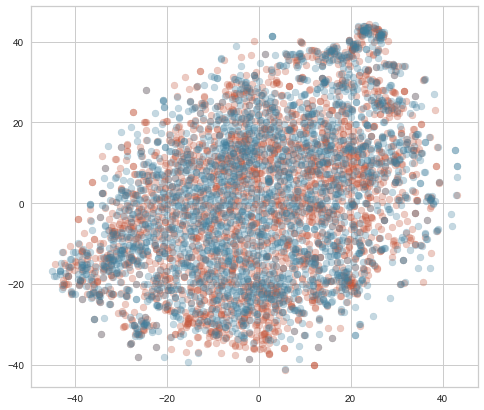

In [90]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

labels = ['war', 'not war']
lists = [sample_war, sample_nowar]
for label in labels:
    
    if label == 'war': data = tsne_countries[:2500, :]
    elif label == 'not war': data = tsne_countries[2500:, :]
    
    ax.scatter(data[:,0], data[:,1], color=category2color[label], label=label, alpha=.3)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,7))

labels = ['war', 'not war']
lists = [sample_war, sample_nowar]
for label in labels:
    
    if label == 'war': data = tsne_countries[:2500, :]
    elif label == 'not war': data = tsne_countries[2500:, :]
    
    ax.scatter(data[:,0], data[:,1], color=category2color[label], label=label, alpha=.3)

Try the same country with the T-SNE plots

In [121]:
dfa['intrastate_conflict'] = dfa.type_of_conflict.isin(['Internationalized intrastate', 'Intrastate']).astype(int)

In [137]:
dfa.groupby('countryname').intrastate_conflict.mean().sort_values()[30:50]

countryname
Libya                       0.122449
Liberia                     0.140000
Djibouti                    0.151515
South Africa                0.156250
Nigeria                     0.200000
Senegal                     0.204082
Central African Republic    0.212766
Sierra Leone                0.220000
Niger                       0.224490
Mali                        0.234043
Egypt                       0.244898
Morocco                     0.313725
Rwanda                      0.372549
Burundi                     0.380000
DR Congo                    0.387755
Mozambique                  0.466667
Algeria                     0.549020
Somalia                     0.560976
Chad                        0.693878
Ethiopia                    0.700000
Name: intrastate_conflict, dtype: float64

In [138]:
countries = ['Egypt', 'Morocco', 'Rwanda', 'Burundi',
             'DR Congo', 'Mozambique', 'Algeria', 'Somalia', 'Chad', 'Ethiopia']

In [139]:
country = countries[0]

In [146]:
country_arr_bool = country_numbers == country
war_arr_all = np.array(war_numbers[country_arr_bool])
embed_arr_plot = np.array(embed_arr_plot['embed'])[country_arr_bool]

war_1 = war_arr_all == 1
war_0 = war_arr_all == 0

In [147]:
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, random_state=0)
tsne_country = tsne.fit_transform(embed_arr)

In [166]:
category2color = {'war': '#C3553A', 'not war': '#407E9C'}
labels = ['war', 'not war']

In [176]:
countries[:2]

['Egypt', 'Morocco']

In [179]:
tsne_indices = {}

In [187]:
dfa[dfa.n_conflicts == 2]

,year,country,text,session,country_map,is_war,n_conflicts,total_deaths,incompatibility,intensity,type_of_conflict,conflict_before,no_tokens,countryname,continent,sentences,sentences_multiple_tokens,intrastate_conflict
41,2016,CMR,Cameroon wishes to congratulate Mr. Thomson on...,71,CMR,True,2,221.0,G&T (multiple conflicts),Conflict,Intrastate,Conflict before,915,Cameroon,AF,"[['cameroon', 'wishes', 'to', 'congratulate', ...","[[cameroon, wishes, to, congratulate, mr, thom...",1
42,2017,CMR,"I would like to congratulate you, Mr. Presiden...",72,CMR,True,2,98.0,G&T (multiple conflicts),Conflict,Intrastate,Conflict before,1205,Cameroon,AF,"[['i', 'would', 'like', 'to', 'congratulate', ...","[[i, would, like, to, congratulate, you, mr, p...",1
44,2019,CMR,"At the outset, allow me to convey to the Membe...",74,CMR,True,2,693.0,Territory,Conflict,Multiple conflicts,Conflict before,2831,Cameroon,AF,"[['at', 'the', 'outset', 'allow', 'me', 'to', ...","[[at, the, outset, allow, me, to, convey, to, ...",0
142,2015,DZA,"On behalf of Algeria, I would like to warmly c...",70,DZA,True,2,110.0,G&T (multiple conflicts),Conflict,Intrastate,Conflict before,1650,Algeria,AF,"[['on', 'behalf', 'of', 'algeria', 'i', 'would...","[[on, behalf, of, algeria, i, would, like, to,...",1
435,2015,LBY,"As the General Assembly gathers this year, we ...",70,LBY,True,2,274.0,G&T (multiple conflicts),Conflict,Intrastate,Conflict before,2070,Libya,AF,"[['as', 'the', 'general', 'assembly', 'gathers...","[[as, the, general assembly, gathers, this, ye...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,1995,AGO,"Permit me at\nthe outset, Sir, on behalf of th...",50,AGO,True,2,187.0,G&T (multiple conflicts),Conflict,Intrastate,Conflict before,2949,Angola,AF,"[['permit', 'me', 'at', 'the', 'outset', 'sir'...","[[permit, me, at, the, outset, sir, on, behalf...",1
2230,1998,AGO,Allow me to\nbegin by congratulating Mr. Didie...,53,AGO,True,2,1066.0,G&T (multiple conflicts),Conflict & War (multiple conflicts),Intrastate,Conflict before,3198,Angola,AF,"[['allow', 'me', 'to', 'begin', 'by', 'congrat...","[[allow, me, to, begin, by, congratulating, mr...",1
2234,2002,AGO,"﻿Allow me, on\nbehalf of my Government and in ...",57,AGO,True,2,526.0,G&T (multiple conflicts),Conflict,Multiple conflicts,Conflict before,1244,Angola,AF,"[['allow', 'me', 'on', 'behalf', 'of', 'my', '...","[[allow, me, on, behalf, of, my, government, a...",0
2395,1999,ERI,Allow me at the outset to\njoin with others wh...,54,ERI,True,2,47217.0,G&T (multiple conflicts),Conflict & War (multiple conflicts),Multiple conflicts,Conflict before,2520,Eritrea,AF,"[['allow', 'me', 'at', 'the', 'outset', 'to', ...","[[allow, me, at, the, outset, to, join, with, ...",0


In [189]:
conf = pd.read_excel(r'C:\Users\Paulius\OneDrive\Oxford University\Courses\Trinity\Thesis\Raw Data UN\Conflict and UN Data\ucdp-brd-conf-201.xlsx')

In [193]:
conf[(conf.location_inc == 'Cameroon') & (conf.year == 2019)]

,conflict_id,dyad_id,location_inc,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,...,battle_location,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,gwno_battle,region,version,Unnamed: 25
159,13638,14666,Cameroon,Government of Cameroon,83,Government of Chad,IS,234,NaN,1,...,Cameroon,471,483,NaN,NaN,471,471,4,20.1,NaN
611,14129,15895,Cameroon,Government of Cameroon,83,NaN,Ambazonia insurgents,7332,NaN,1,...,Cameroon,471,NaN,NaN,NaN,471,471,4,20.1,NaN


Country: Egypt
Country: Morocco
Country: Rwanda
Country: Burundi
Country: DR Congo
Country: Mozambique
Country: Algeria
Country: Somalia
Country: Chad
Country: Ethiopia


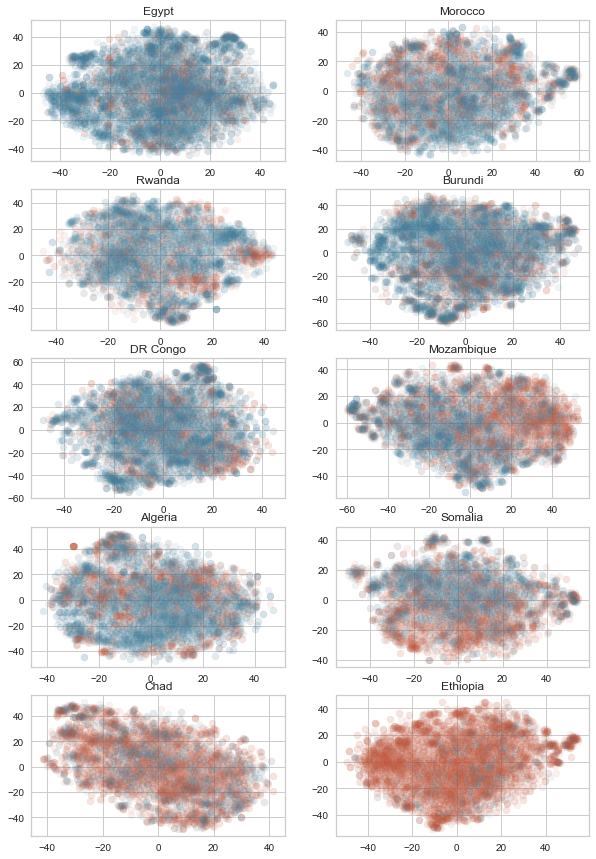

In [184]:
fig, axs = plt.subplots(5,2, figsize=(10,15))

axs_list = axs.flatten()

for i, country in enumerate(countries):
    print(f"Country: {country}")
    
    # Get the axis
    ax = axs_list[i]
    
    # Get the war booleans
    country_arr_bool = country_numbers == country
    war_arr_all = np.array(war_numbers[country_arr_bool])
    embed_arr_plot = np.array(embed_arr['embed'])[country_arr_bool]

    # Get TSNE
    tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, random_state=0)
    tsne_country = tsne.fit_transform(embed_arr_plot)

    # Append indices
    tsne_indices[country] = tsne_country

    # Get war indices
    war_1 = war_arr_all == 1
    war_0 = war_arr_all == 0
    
    # Plot the T-SNE plot
    for label in labels:
        if label == 'war': data = tsne_country[war_1, :]
        elif label == 'not war': data = tsne_country[war_0, :]
    
        ax.scatter(data[:,0], data[:,1], color=category2color[label], label=label, alpha=.08)
    ax.set_title(country)

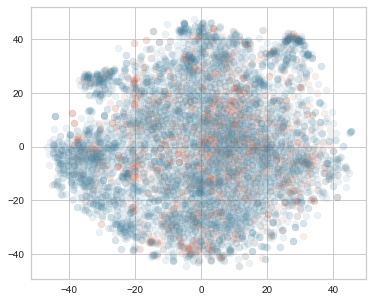

In [161]:
fig, ax = plt.subplots(1,1, figsize=(6,5))
for label in labels:
    if label == 'war': data = tsne_country[war_1, :]
    elif label == 'not war': data = tsne_country[war_0, :]
    
    ax.scatter(data[:,0], data[:,1], color=category2color[label], label=label, alpha=.1)